<h1>Project Machine Learning dengan Python untuk Pemula</h1>

Cara paling cepat untuk menguasai sebuah tool atau platform adalah dengan mengimplementasi sebuah end-to-end project yang mencakup langkah-langkah utama dalam implementasi machine learning. Langkah tersebut antara lain adalah : loading data, summary data, evaluasi algoritma dan membuat beberapa prediksi.

Membuat end-to-end project berarti membiasakan diri dengan proses machine learning, dan kasus yang telah dikerjakan dapat menjadi semacam template yang bisa digunakan untuk mengolah berbagai dataset lainnya.

Untuk memulainya tidak perlu menggunakan dataset atau kasus yang terlalu rumit. Anda bisa memilih data yang tersedia di dalam library scikit-learn. Daftar lengkap datasetnya dapat dilihat di sini.

Dalam artikel ini akan digunakan dataset iris sebagai contoh kasusnya. 

Dataset iris ini sangat sesuai untuk latihan karena :
- Ukurannya tidak terlalu besar, yaitu 4 atribut dan 150 row, sehingga tidak akan membebani memori
- Atributnya sederhana. Seluruh atribut numerik dalam unit dan skala yang sama, sehingga tidak memerlukan transformasi khusus


Meskipun teknik dan prosedur dalam penerapan machine learning sangat bervariasi, namun secara garis besar sebuah project machine learning memiliki tahapan sebagai berikut:
- Definisi masalah
- Menyiapkan data
- Memilih/mengevaluasi algoritma
- Melakukan tuning untuk memperbaiki hasil
- Menyajikan hasil

Salah satu hal yang paling penting dalam langkah-langkah awal project adalah memahami data. Dalam artikel ini akan disajikan mengenai loading dan beberapa fungsi eksplorasi data untuk melihat bagaimana dataset yang akan kita proses nantinya.



<h3> 1. Cek Instalasi </h3>

Jalankan perintah-perintah berikut untuk mengecek versi package yang terinstall.
Versi yang package yang akan gunakan mestinya lebih baru atau setidaknya sama dengan yang terdapat pada output di bawah ini. Jika versi package anda sedikit tertinggal, mestinya tidak masalah, karena biasanya API-nya tidak terlalu banyak berubah. Anda masih dapat menjalankan code yang ada dalam latihan di bawah ini. Tapi jika ingin memperbaharui package yang ada, langkah update package dapat dilihat di posting sebelumnya.



In [1]:
import pandas
import sklearn
import scipy
import numpy
import matplotlib
pandas.__version__, sklearn.__version__, scipy.__version__, numpy.__version__, matplotlib.__version__

('0.20.3', '0.19.1', '0.19.1', '1.13.3', '2.1.0')

Berikutnya adalah loading package yang akan digunakan. Lakukan import untuk mengecek apakah instalasi sudah ok. Jika terdapat error, stop dan resolve. Package di bawah ini perlu untuk menjalankan latihan dalam artikel ini.

Petunjuk setting environment bisa dilihat di posting sebelumnya. Jika terdapat pesan error yang spesifik, anda bisa mencari cara resolve-nya di forum-forum seperti Stack Exchange (http://stackoverflow.com/questions/tagged/python).

In [2]:
#from pandas.tools.plotting import scatter_matrix
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import datasets
import numpy

<h3>2. Loading Data</h3>

Jika langkah di atas berjalan dengan baik, load dataset iris dari package sklearn dengan menjalankan fungsi berikut: 

In [3]:
iris = datasets.load_iris()

Dataset iris ini di-load ke dalam sebuah object semacam dictionary (tuples dengan pasangan key-value). Untuk mengakses isi atau value dari sebuah dictionary dilakukan dengan memanggil key-nya.

Tips : Untuk mengetahui jenis sebuah object atau fungsi dalam python, kita bisa mengetikkan nama object atau fungsi yang ingin kita ketahui, diikuti tanda tanya, seperti pada contoh berikut :


In [4]:
iris?

Untuk mengetahui apa saja yang terdapat di dalam dataset iris, tampilkan seluruh keys dalam dataset tersebut dengan perintah berikut ini: 

In [5]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

Dari outputnya kita dapat mengetahui bahwa dalam dataset iris terdapat key berikut : data, target, target_name, DESCR dan feature_names. Kita dapat mengakses dan menampilkan value-nya dengan key tersebut. Misalnya untuk menampilkan deskripsi dataset, lakukan sbb:

In [7]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

Seperti tampak pada deskripsi di atas, dataset iris memiliki 4 atribut numerik : sepal length, sepal width, petal length, dan petal width.

Terdapat 3 jenis spesies (class), yaitu  
- Iris-Setosa
- Iris-Versicolour
- Iris-Virginica

Terdapat 150 entry (150 rows data), yang terbagi rata ke dalam 3 kelas tersebut.

Atribut disimpan di elemen "data", dan kelas/species di elemen "target". Keduanya bertipe numerik.  

Kita lihat bentuk datanya, dengan ‘mengintip’ beberapa baris data dan target, dengan command berikut:

In [8]:
print(iris.data[0:5])
print(iris.target)


[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Dari output di atas terlihat bahwa format data adalah numerik, dan nilai target menunjukkan indeks dari array target_names. 


<b> Convert dataset ke dalam Pandas DataFrame </b>

Untuk memudahkan pemrosesan dan eksplorasi data, kita akan mengubah dataset tersebut ke dalam format pandas DataFrame. 
Pandas adalah package yang dibangun di atas library numPy. Pandas menyediakan data struktur yang efisien dan fleksibel, yang dirancang untuk melakukan analisis data dalam Python. 
Untuk mempelajari lebih lanjut mengenai pandas dan object-objectnya, dapat dilihat di sini (https://pandas.pydata.org/pandas-docs/stable/)

Berikut ini command untuk mengubah dataset iris menjadi Pandas Dataframe:

In [9]:
dataset = pandas.DataFrame(data= numpy.c_[iris['data']],
                     columns= iris['feature_names'])
dataset['class'] = numpy.c_[list(map((lambda x: iris.target_names[x]), iris.target))]

<b> 4. Eksplorasi Dataset </b>

Beberapa hal yang akan kita lakukan adalah :
Melihat dimensi dataset
Contoh datanya
Ringkasan statistik semua atribut
Mengelompokkan data berdasar variabel target

Yang pertama kita lihat dimensi datanya (jumlah row dan kolom) dengan menggunakan atribut <b>shape</b>.

In [12]:
# shape
print(dataset.shape)

(150, 5)


Selanjutnya kita 'intip' contoh data dengan menggunakan fungsi head. Dari sini terlihat dataset kita memiliki 4 atribut numerik dan 1 atribut string.

In [13]:
print(dataset.head(5))

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

    class  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


<h3> Statistical Summary</h3>

Selanjutnya kita lihat summary setiap atribut dengan fungsi describe. Fungsi ini menampilkan summary statistik untuk atribut numerik dari dataset kita, termasuk di dalamnya count, mean, nilai minimum dan maksimum, serta nilai2 persentilnya.
Dari summary tersebut terlihat bahwa seluruh nilai numerik memiliki skala yang sama (yaitu dalam cm), dan memiliki range yang serupa juga, yaitu antara 0 sampai 8 cm.

In [14]:
print(dataset.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.054000           3.758667   
std             0.828066          0.433594           1.764420   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.198667  
std            0.763161  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


<h3>Distribusi Data</h3>

Bagaimana dengan distribusi datanya? 
Untuk melihat distribusi data, kita kelompokkan datanya berdasarkan kelas sbb:

In [15]:
print(dataset.groupby('class').size())

class
setosa        50
versicolor    50
virginica     50
dtype: int64


Terlihat bahwa data terbagi menjadi 3 kelas dengan jumlah yang sama, yaitu masing-masing 50 row.

<h3>Visualisasi Data</h3>

Kita juga dapat melihat 'bentuk' data dengan lebih jelas dengan cara memvisualisasikannya. Yang pertama kita bisa melihat distribusi masing-masing atribut dengan menampilkan boxplot.

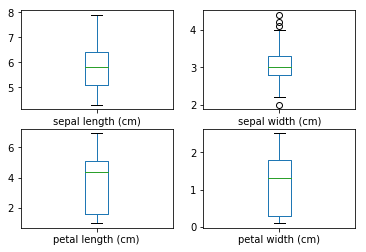

In [16]:
#import seaborn; seaborn.set()
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

Kita juga bisa melihat sebaran datanya dengan histogram. 

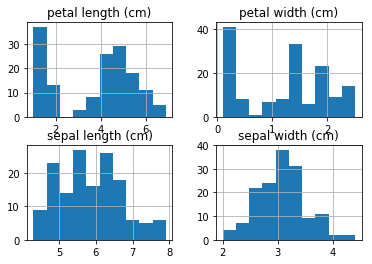

In [17]:
dataset.hist()
plt.show()

Dari histogram di atas tampak bahwa setidaknya ada 2 variabel yang kemungkinan memiliki sebaran normal. Asumsi ini dapat kita jadikan pertimbangan ketika memilih algoritma nantinya. 

<h3>Interaksi Antar Variabel</h3>

Selanjutnya kita lihat interaksi antara variabel dengan menampilkan scatterplot. Hal ini bermanfaat untuk melihat adanya hubungan antara variabel-variabel input. Indikasi adanya korelasi antar variabel adalah dari pola scatterplot yang membentuk garis  diagonal.

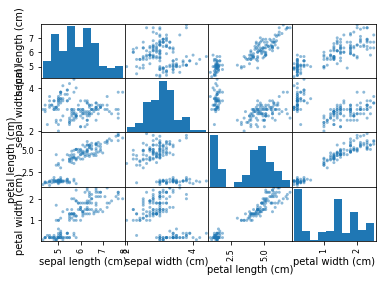

In [18]:
scatter_matrix(dataset)
plt.show()

Setelah kita mendapat gambaran mengenai dataset yang akan kita proses, kita siap melakukan testing dan tuning algoritma. 

Sumber : https://machinelearningmastery.com/machine-learning-in-python-step-by-step/ 